# 导入必要的库
导入pandas库。

In [1]:
import pandas as pd  # 导入pandas库
import numpy as np  # 导入numpy库
import matplotlib.pyplot as plt  # 导入matplotlib库

# 读取M101.csv文件
使用pandas的read_csv函数读取M101.csv文件。

In [5]:
# 使用pandas的read_csv函数读取M101.csv文件
df_M101 = pd.read_csv('附件1/M101.csv', encoding='gbk')  # 读取M101.csv文件
df_M101.head()  # 展示前5行数据

,月份,日期,时间,故障类别,推出状态,推出累计数,抓取状态,抓取累计数,安装状态,安装累计数,检测状态,检测累计数,合格产品累计数,不合格产品累计数
0,1,1,1,NaN,1,1,0,0,0,0,0,0,0,0
1,1,1,2,NaN,0,1,0,0,0,0,0,0,0,0
2,1,1,3,NaN,0,1,0,0,0,0,0,0,0,0
3,1,1,4,NaN,1,2,0,0,0,0,0,0,0,0
4,1,1,5,NaN,0,2,0,0,0,0,0,0,0,0


# 展示基本信息
使用info()和describe()方法展示M101.csv文件的基本信息。

In [6]:
# 使用info()和describe()方法展示M101.csv文件的基本信息
df_M101.info()  # 展示数据框的基本信息
df_M101.describe()  # 展示数据框的描述性统计信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10511635 entries, 0 to 10511634
Data columns (total 14 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   月份        int64 
 1   日期        int64 
 2   时间        int64 
 3   故障类别      object
 4   推出状态      int64 
 5   推出累计数     int64 
 6   抓取状态      int64 
 7   抓取累计数     int64 
 8   安装状态      int64 
 9   安装累计数     int64 
 10  检测状态      int64 
 11  检测累计数     int64 
 12  合格产品累计数   int64 
 13  不合格产品累计数  int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ GB


,月份,日期,时间,推出状态,推出累计数,抓取状态,抓取累计数,安装状态,安装累计数,检测状态,检测累计数,合格产品累计数,不合格产品累计数
count,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07,1.051164e+07
mean,6.526027e+00,1.572055e+01,1.440000e+04,1.019719e-01,1.640765e+03,-7.575606e-03,1.637136e+03,2.140354e-01,1.636878e+03,1.670332e-01,1.633484e+03,1.630661e+03,2.823382e+00
std,3.447851e+00,8.796247e+00,8.313556e+03,3.364814e-01,9.430555e+02,4.825517e-01,9.430519e+02,4.609200e-01,9.430538e+02,5.052199e-01,9.430542e+02,9.414115e+02,3.031115e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,7.200000e+03,0.000000e+00,8.470000e+02,0.000000e+00,8.430000e+02,0.000000e+00,8.430000e+02,0.000000e+00,8.390000e+02,8.380000e+02,1.000000e+00
50%,7.000000e+00,1.600000e+01,1.440000e+04,0.000000e+00,1.640000e+03,0.000000e+00,1.637000e+03,0.000000e+00,1.636000e+03,0.000000e+00,1.633000e+03,1.630000e+03,2.000000e+00
75%,1.000000e+01,2.300000e+01,2.160000e+04,0.000000e+00,2.435000e+03,0.000000e+00,2.431000e+03,0.000000e+00,2.431000e+03,0.000000e+00,2.428000e+03,2.423000e+03,4.000000e+00
max,1.200000e+01,3.100000e+01,2.879900e+04,1.000000e+00,3.905000e+03,1.000000e+00,3.901000e+03,1.000000e+00,3.901000e+03,1.000000e+00,3.897000e+03,3.889000e+03,2.100000e+01


In [7]:
df_M101.columns

Index(['月份', '日期', '时间', '故障类别', '推出状态', '推出累计数', '抓取状态', '抓取累计数', '安装状态',
       '安装累计数', '检测状态', '检测累计数', '合格产品累计数', '不合格产品累计数'],
      dtype='object')

原表中， 检测累计数 = 合格累计数 + 不合格累计数
累计数是一天开机到当前时刻的累计值，所以要一天的数据，去这一天最后一个时刻就行。一定是递增的，取最大值就行

将月份、日期合成一个日期，根据日期对数据聚类统计，求三个指标

In [18]:
# 计算每天的产品总数、合格产品数、不合格产品数与合格率
df_M101['新日期'] = df_M101['月份'].astype(str) + '-' + df_M101['日期'].astype(str)
daily_stats_M101 = df_M101.groupby('新日期').agg(
    总产品数=('检测累计数', 'max'),
    合格产品数=('合格产品累计数', 'max'),
    不合格产品数=('不合格产品累计数', 'max')
).reset_index()


daily_stats_M101['合格率'] = daily_stats_M101['合格产品数'] / daily_stats_M101['总产品数']


# 下面代码纯粹是为了让它好看一点
daily_stats_M101[['月份', '日期']] = daily_stats_M101['新日期'].str.split('-', expand=True)
# 转换月份和日期为整数类型以便排序
daily_stats_M101['月份'] = daily_stats_M101['月份'].astype(int)
daily_stats_M101['日期'] = daily_stats_M101['日期'].astype(int)

# 按月份和日期排序
daily_stats_M101 = daily_stats_M101.sort_values(by=['月份', '日期'])



# 展示统计结果
print(daily_stats_M101)

       新日期  总产品数  合格产品数  不合格产品数       合格率  月份  日期
0      1-1  3462   3453       9  0.997400   1   1
11     1-2  3252   3245       7  0.997847   1   2
22     1-3  3453   3449       4  0.998842   1   3
25     1-4  3466   3461       5  0.998557   1   4
26     1-5  3443   3439       4  0.998838   1   5
..     ...   ...    ...     ...       ...  ..  ..
111  12-27  3472   3462      10  0.997120  12  27
112  12-28  3556   3551       5  0.998594  12  28
113  12-29  3233   3231       2  0.999381  12  29
115  12-30  3343   3343       0  1.000000  12  30
116  12-31  3660   3651       9  0.997541  12  31

[365 rows x 7 columns]


所有实数类型的结果保留两位小数。

In [19]:
daily_stats_M101.head()

,新日期,总产品数,合格产品数,不合格产品数,合格率,月份,日期
0,1-1,3462,3453,9,0.997400,1,1
11,1-2,3252,3245,7,0.997847,1,2
22,1-3,3453,3449,4,0.998842,1,3
25,1-4,3466,3461,5,0.998557,1,4
26,1-5,3443,3439,4,0.998838,1,5


# 1.1 M102的数据

In [15]:
# 读取M102.csv文件
# df_M101['新日期'] = df_M101['月份'].astype(str) + '-' + df_M101['日期'].astype(str)
df_M102 = pd.read_csv('附件1/M102.csv', encoding='gbk')
# 计算每天的产品总数、合格产品数、不合格产品数与合格率
df_M102['新日期'] = df_M102['月份'].astype(str) + '-' + df_M102['日期'].astype(str)
daily_stats_M102 = df_M102.groupby('新日期').agg(
    总产品数=('检测累计数', 'max'),
    合格产品数=('合格产品累计数', 'max'),
    不合格产品数=('不合格产品累计数', 'max')
).reset_index()
daily_stats_M102['合格率'] = daily_stats_M102['合格产品数'] / daily_stats_M102['总产品数']


# 下面代码纯粹是为了让它好看一点
daily_stats_M102[['月份', '日期']] = daily_stats_M102['新日期'].str.split('-', expand=True)
# 转换月份和日期为整数类型以便排序
daily_stats_M102['月份'] = daily_stats_M102['月份'].astype(int)
daily_stats_M102['日期'] = daily_stats_M102['日期'].astype(int)

# 按月份和日期排序
daily_stats_M102 = daily_stats_M102.sort_values(by=['月份', '日期'])


# 展示统计结果
print(daily_stats_M102)

       新日期  总产品数  合格产品数  不合格产品数       合格率  月份  日期
0      1-1  3519   3518       1  0.999716   1   1
11     1-2  3319   3318       1  0.999699   1   2
22     1-3  3436   3435       1  0.999709   1   3
25     1-4  3445   3444       1  0.999710   1   4
26     1-5  3363   3362       1  0.999703   1   5
..     ...   ...    ...     ...       ...  ..  ..
111  12-27  3424   3421       3  0.999124  12  27
112  12-28  3631   3626       5  0.998623  12  28
113  12-29  3184   3181       3  0.999058  12  29
115  12-30  3409   3407       2  0.999413  12  30
116  12-31  3530   3530       0  1.000000  12  31

[365 rows x 7 columns]


In [20]:
# 将M101的每日统计数据写入文件
daily_stats_M101.to_csv('daily_stats_M101.csv', index=False, encoding='gbk')


In [24]:
daily_stats_M101.head()

,新日期,总产品数,合格产品数,不合格产品数,合格率,月份,日期
0,1-1,3462,3453,9,0.997400,1,1
11,1-2,3252,3245,7,0.997847,1,2
22,1-3,3453,3449,4,0.998842,1,3
25,1-4,3466,3461,5,0.998557,1,4
26,1-5,3443,3439,4,0.998838,1,5


In [17]:

# 将M102的每日统计数据写入文件
daily_stats_M102.to_csv('daily_stats_M102.csv', index=False, encoding='gbk')

计算全年各生产线全年的产品总数、合格产品数、不合格产品数与合格率（报告中给出）

In [38]:
# 计算M101全年的产品总数、合格产品数、不合格产品数与合格率
annual_stats_M101 = daily_stats_M101.agg({
    '总产品数': 'sum',
    '合格产品数': 'sum',
    '不合格产品数': 'sum'
}).to_frame().T
annual_stats_M101['合格率'] = (annual_stats_M101['合格产品数'] / annual_stats_M101['总产品数'])
# 小数保留 其实应该保2位
annual_stats_M101 = annual_stats_M101.round(4)
# 展示统计结果
print(annual_stats_M101)

      总产品数    合格产品数  不合格产品数     合格率
0  1183016  1180910    2106  0.9982


In [189]:
# 计算M102全年的产品总数、合格产品数、不合格产品数与合格率
annual_stats_M102 = daily_stats_M102.agg({
    '总产品数': 'sum',
    '合格产品数': 'sum',
    '不合格产品数': 'sum'
}).to_frame().T
annual_stats_M102['合格率'] = (annual_stats_M102['合格产品数'] / annual_stats_M102['总产品数'])
# 小数保留 其实应该保2位
annual_stats_M102 = annual_stats_M102.round(4)
# 展示统计结果
print(annual_stats_M102)

      总产品数    合格产品数  不合格产品数    合格率
0  1186838  1184461    2377  0.998


In [36]:
annual_stats_M101.head()

,总产品数,合格产品数,不合格产品数,合格率
0,1183016,1180910,2106,1.0


说明故障不存在跨越了一天的

In [42]:
# 提取每一个‘时间’为1且‘故障类别’非空的行
df_faults_time_1 = df_M101[(df_M101['时间'] == 1) & (df_M101['故障类别'].notna())]
print(df_faults_time_1)
# M102也检查
df_faults_time_1_M102 = df_M102[(df_M102['时间'] == 1) & (df_M102['故障类别'].notna())]
print(df_faults_time_1_M102)

Empty DataFrame
Columns: [月份, 日期, 时间, 故障类别, 推出状态, 推出累计数, 抓取状态, 抓取累计数, 安装状态, 安装累计数, 检测状态, 检测累计数, 合格产品累计数, 不合格产品累计数, 新日期]
Index: []
Empty DataFrame
Columns: [月份, 日期, 时间, 故障类别, 推出状态, 推出累计数, 抓取状态, 抓取累计数, 安装状态, 安装累计数, 检测状态, 检测累计数, 合格产品累计数, 不合格产品累计数, 新日期]
Index: []


In [47]:
# 选取df_M101中‘故障类别’列非空的行
df_1_faults = df_M101[df_M101['故障类别'].notna()].copy()
# 保留 月份 日期  时间 故障类别 列
df_1_faults = df_1_faults[['月份', '日期', '时间', '故障类别']]
# 初始化结果列表
fault_periods = []
# 用于遍历
start_idx = 0
while start_idx < len(df_1_faults):
    end_idx = start_idx # 开始一次识别
    while  (end_idx + 1 < len(df_1_faults) and 
           df_1_faults.iloc[end_idx + 1]['故障类别'] == df_1_faults.iloc[start_idx]['故障类别'] and 
           df_1_faults.iloc[end_idx + 1]['时间'] - df_1_faults.iloc[end_idx]['时间'] == 1):
        end_idx += 1 # 说明同一条记录
    # 当上面循环结束
    start_time = df_1_faults.iloc[start_idx]['时间']
    end_time = df_1_faults.iloc[end_idx]['时间']
    duration = end_time - start_time
    fault_periods.append({
            '月份': df_1_faults.iloc[start_idx]['月份'],
            '日期': df_1_faults.iloc[start_idx]['日期'],
            '故障类别': df_1_faults.iloc[start_idx]['故障类别'],
            '开始时间': start_time,
            '结束时间': end_time,
            '持续时间': duration
        })
    start_idx = end_idx + 1

# 转换结果为DataFrame
df_fault_periods = pd.DataFrame(fault_periods)

# 按照月份、日期和开始时间升序排列
df_fault_periods = df_fault_periods.sort_values(by=['月份', '日期', '开始时间'])



In [49]:
df_1_faults

,月份,日期,时间,故障类别
4548,1,1,4549,A2
4549,1,1,4550,A2
4550,1,1,4551,A2
4551,1,1,4552,A2
4552,1,1,4553,A2
...,...,...,...,...
10506915,12,31,24080,A2
10506916,12,31,24081,A2
10506917,12,31,24082,A2
10506918,12,31,24083,A2


In [50]:
df_fault_periods # 这是M101的

,月份,日期,故障类别,开始时间,结束时间,持续时间
0,1,1,A2,4549,5231,682
1,1,1,A2,7668,8194,526
2,1,1,A2,9476,10114,638
3,1,1,A2,11935,12648,713
4,1,1,A2,16520,16879,359
...,...,...,...,...,...,...
3715,12,31,A2,7593,7971,378
3716,12,31,A2,9400,9984,584
3717,12,31,A2,15536,15981,445
3718,12,31,A2,21645,22235,590


array(['A2', 'A1', 'A4', 'A3'], dtype=object)

df_fault_periods  是M101的 故障记录表，包含月份日期开始时间持续时间故障类别

# 1.2.2  计算M102 故障记录

In [52]:
# 选取df_M102中‘故障类别’列非空的行
df_2_faults = df_M102[df_M102['故障类别'].notna()].copy()
# 保留 月份 日期 时间 故障类别 列
df_2_faults = df_2_faults[['月份', '日期', '时间', '故障类别']]
# 初始化结果列表
fault_periods_M102 = []
# 用于遍历
start_idx = 0
while start_idx < len(df_2_faults):
    end_idx = start_idx  # 开始一次识别
    while (end_idx + 1 < len(df_2_faults) and 
           df_2_faults.iloc[end_idx + 1]['故障类别'] == df_2_faults.iloc[start_idx]['故障类别'] and 
           df_2_faults.iloc[end_idx + 1]['时间'] - df_2_faults.iloc[end_idx]['时间'] == 1):
        end_idx += 1  # 说明同一条记录
    # 当上面循环结束
    start_time = df_2_faults.iloc[start_idx]['时间']
    end_time = df_2_faults.iloc[end_idx]['时间']
    duration = end_time - start_time
    fault_periods_M102.append({
            '月份': df_2_faults.iloc[start_idx]['月份'],
            '日期': df_2_faults.iloc[start_idx]['日期'],
            '故障类别': df_2_faults.iloc[start_idx]['故障类别'],
            '开始时间': start_time,
            '结束时间': end_time,
            '持续时间': duration
        })
    start_idx = end_idx + 1

# 转换结果为DataFrame
df_fault_periods_M102 = pd.DataFrame(fault_periods_M102)

# 按照月份、日期和开始时间升序排列
df_fault_periods_M102 = df_fault_periods_M102.sort_values(by=['月份', '日期', '开始时间'])



In [194]:
# 将df_1_faults输出为 ‘去除无故障记录后M101.csv’
df_1_faults.to_csv('去除无故障记录后M101.csv', index=False, encoding='gbk')

# 将df_2_faults输出为 ‘去除无故障记录后M102.csv’
df_2_faults.to_csv('去除无故障记录后M102.csv', index=False, encoding='gbk')

In [53]:
# 展示统计结果
print(df_fault_periods_M102)

      月份  日期 故障类别   开始时间   结束时间  持续时间
0      1   1   A4   1627   2378   751
1      1   1   A2   7744   8205   461
2      1   1   A3  15074  15812   738
3      1   1   A2  15945  16330   385
4      1   1   A3  19916  20586   670
...   ..  ..  ...    ...    ...   ...
3645  12  31   A2   8560   9102   542
3646  12  31   A3  14515  15131   616
3647  12  31   A2  16538  16969   431
3648  12  31   A2  21828  22526   698
3649  12  31   A2  24662  25034   372

[3650 rows x 6 columns]


df_fault_periods （M101的故障记录表）生成花了3分钟多
df_fault_periods (M102的故障记录) 生成花了3分钟多

In [54]:
# 把故障记录保存到文件，分别叫 M101故障记录.csv 和 M102故障记录.csv

df_fault_periods.to_csv('M101故障记录.csv', index=False, encoding='gbk')
df_fault_periods_M102.to_csv('M102故障记录.csv', index=False, encoding='gbk')

## 这里检查故障类别的取值，故障只有4种，A1，A2，A3，A4
1.2 要求统计每种故障第25次出现

In [56]:
# df_fault_periods 故障类别的不同值
df_fault_periods['故障类别'].unique()

array(['A2', 'A1', 'A4', 'A3'], dtype=object)

In [55]:
# 检查M102故障类别的取值
df_fault_periods_M102['故障类别'].unique()

array(['A4', 'A2', 'A3', 'A1'], dtype=object)

In [72]:
# M101 每种故障第25次出现的月份、日期、开始时间、持续时长
M101_fault_25th_time = df_fault_periods.groupby('故障类别').nth(24).reset_index()
# 调整列的顺序为 ‘故障类别’‘月份’‘日期’‘开始时间’‘持续时间’，按照类别排列
M101_fault_25th_time = M101_fault_25th_time[['故障类别', '月份', '日期', '开始时间', '持续时间']]
# 按照类别为A1，A2，A3，A4
M101_fault_25th_time = M101_fault_25th_time.sort_values(by='故障类别')
# M102
M102_fault_25th_time = df_fault_periods_M102.groupby('故障类别').nth(24).reset_index()
# 调整列的顺序为 ‘故障类别’‘月份’‘日期’‘开始时间’‘持续时间’，按照类别排列
M102_fault_25th_time = M102_fault_25th_time[['故障类别', '月份', '日期', '开始时间', '持续时间']]
# 按照类别为A1，A2，A3，A4
M102_fault_25th_time = M102_fault_25th_time.sort_values(by='故障类别')

# 1.2 对应表4

In [71]:
print(M101_fault_25th_time)  
print(M102_fault_25th_time)

  故障类别  月份  日期   开始时间  持续时间
3   A1   2  14  28553   246
0   A2   1   4  19819   671
2   A3   1  30   3717   864
1   A4   1  13  22814   886
  故障类别  月份  日期   开始时间  持续时间
0   A2   1   5   7842   383
1   A4   1  14  28122   624
2   A3   2  12  12307   736
3   A1   3   2  25982   580


# 1.3


In [170]:
# 这个表需要每一天日期，日期可以从daily_stats_M102获得
# 提取daily_stats_M102中的‘月份’和‘日期’列
df_temp = daily_stats_M102[['月份', '日期']].copy()

# 故障类别取值
all_fault_types = ['A1', 'A2', 'A3', 'A4']
# 使用pd.DataFrame的reindex方法扩展行数
df_temp = df_temp.reindex(df_temp.index.repeat(len(all_fault_types)))

# 添加故障类别列
df_temp['故障类别'] = all_fault_types * (len(df_temp) // len(all_fault_types))

df_temp.reset_index(drop=True, inplace=True)


df_temp

,月份,日期,故障类别
0,1,1,A1
1,1,1,A2
2,1,1,A3
3,1,1,A4
4,1,2,A1
...,...,...,...
1455,12,30,A4
1456,12,31,A1
1457,12,31,A2
1458,12,31,A3


In [171]:
# 统计每天每种故障的次数以及平均持续时间
fault_stats = df_fault_periods.groupby(['月份', '日期', '故障类别']).agg(
    总次数=('故障类别', 'count'),
    平均持续时长=('持续时间', 'mean')
).reset_index()

# 将统计结果合并到df_temp中
df_temp = df_temp.merge(fault_stats, on=['月份', '日期', '故障类别'], how='left')

# 填充缺失值为0
df_temp['总次数'] = df_temp['总次数'].fillna(0).astype(int)
df_temp['平均持续时长'] = df_temp['平均持续时长'].fillna(0).astype(float).round(2)
# 对于平均持续时长为0的，填充Null而不是0
df_temp.loc[df_temp['平均持续时长'] == 0, '平均持续时长'] = np.nan
# 展示结果
print(df_temp)

      月份  日期 故障类别  总次数  平均持续时长
0      1   1   A1    1  526.00
1      1   1   A2    7  572.14
2      1   1   A3    0     NaN
3      1   1   A4    0     NaN
4      1   2   A1    0     NaN
...   ..  ..  ...  ...     ...
1455  12  30   A4    1  778.00
1456  12  31   A1    0     NaN
1457  12  31   A2    6  523.83
1458  12  31   A3    0     NaN
1459  12  31   A4    0     NaN

[1460 rows x 5 columns]


In [172]:
df_temp

,月份,日期,故障类别,总次数,平均持续时长
0,1,1,A1,1,526.00
1,1,1,A2,7,572.14
2,1,1,A3,0,NaN
3,1,1,A4,0,NaN
4,1,2,A1,0,NaN
...,...,...,...,...,...
1455,12,30,A4,1,778.00
1456,12,31,A1,0,NaN
1457,12,31,A2,6,523.83
1458,12,31,A3,0,NaN


In [173]:
# 把df_temp copy 保存成dataframe ，叫做M101_daily_fault
M101_daily_fault = df_temp.copy()
# 前面加一列‘生产线’，全填M101
M101_daily_fault['生产线'] = 'M101'
# 生产线一列调到第一列
M101_daily_fault = M101_daily_fault[['生产线', '月份', '日期', '故障类别', '总次数', '平均持续时长']]

In [174]:
M101_daily_fault

,生产线,月份,日期,故障类别,总次数,平均持续时长
0,M101,1,1,A1,1,526.00
1,M101,1,1,A2,7,572.14
2,M101,1,1,A3,0,NaN
3,M101,1,1,A4,0,NaN
4,M101,1,2,A1,0,NaN
...,...,...,...,...,...,...
1455,M101,12,30,A4,1,778.00
1456,M101,12,31,A1,0,NaN
1457,M101,12,31,A2,6,523.83
1458,M101,12,31,A3,0,NaN


下面做M102的


In [175]:

# 和M102没任何关系，只是借用一下统计好的每日日期，M102里面的每日日期刚好覆盖365天
df_temp = daily_stats_M102[['月份', '日期']].copy()

# 故障类别取值
all_fault_types = ['A1', 'A2', 'A3', 'A4']
# 使用pd.DataFrame的reindex方法扩展行数
df_temp = df_temp.reindex(df_temp.index.repeat(len(all_fault_types)))

# 添加故障类别列
df_temp['故障类别'] = all_fault_types * (len(df_temp) // len(all_fault_types))

df_temp.reset_index(drop=True, inplace=True)
# 到这里设置好了每日日期和故障类别
# 下面从M102故障记录中统计每日故障次数和平均持续时间， 然后进行表的合并
# 统计每天每种故障的次数以及平均持续时间
fault_stats_M102 = df_fault_periods_M102.groupby(['月份', '日期', '故障类别']).agg(
    总次数=('故障类别', 'count'),
    平均持续时长=('持续时间', 'mean')
).reset_index()

# 将统计结果合并到df_temp中
df_temp = df_temp.merge(fault_stats_M102, on=['月份', '日期', '故障类别'], how='left')

# 填充缺失值为0
df_temp['总次数'] = df_temp['总次数'].fillna(0).astype(int)
df_temp['平均持续时长'] = df_temp['平均持续时长'].fillna(0).astype(float).round(2)
# 对于平均持续时长为0的，填充Null而不是0
df_temp.loc[df_temp['平均持续时长'] == 0, '平均持续时长'] = np.nan

# 展示结果
print(df_temp)



      月份  日期 故障类别  总次数  平均持续时长
0      1   1   A1    0     NaN
1      1   1   A2    4  492.25
2      1   1   A3    2  704.00
3      1   1   A4    1  751.00
4      1   2   A1    0     NaN
...   ..  ..  ...  ...     ...
1455  12  30   A4    2  788.00
1456  12  31   A1    0     NaN
1457  12  31   A2    5  520.20
1458  12  31   A3    2  728.00
1459  12  31   A4    0     NaN

[1460 rows x 5 columns]


In [176]:
# df_temp copy成M102_daily_fault
M102_daily_fault = df_temp.copy()
# 前面加一列 ’生产线‘， 全填M102
M102_daily_fault['生产线'] = 'M102'
# 生产线一列调到第一列
M102_daily_fault = M102_daily_fault[['生产线', '月份', '日期', '故障类别', '总次数', '平均持续时长']]

In [177]:
# 分别展示M101_daily_fault和M102_daily_fault
print(M101_daily_fault)
print(M102_daily_fault)

       生产线  月份  日期 故障类别  总次数  平均持续时长
0     M101   1   1   A1    1  526.00
1     M101   1   1   A2    7  572.14
2     M101   1   1   A3    0     NaN
3     M101   1   1   A4    0     NaN
4     M101   1   2   A1    0     NaN
...    ...  ..  ..  ...  ...     ...
1455  M101  12  30   A4    1  778.00
1456  M101  12  31   A1    0     NaN
1457  M101  12  31   A2    6  523.83
1458  M101  12  31   A3    0     NaN
1459  M101  12  31   A4    0     NaN

[1460 rows x 6 columns]
       生产线  月份  日期 故障类别  总次数  平均持续时长
0     M102   1   1   A1    0     NaN
1     M102   1   1   A2    4  492.25
2     M102   1   1   A3    2  704.00
3     M102   1   1   A4    1  751.00
4     M102   1   2   A1    0     NaN
...    ...  ..  ..  ...  ...     ...
1455  M102  12  30   A4    2  788.00
1456  M102  12  31   A1    0     NaN
1457  M102  12  31   A2    5  520.20
1458  M102  12  31   A3    2  728.00
1459  M102  12  31   A4    0     NaN

[1460 rows x 6 columns]


In [178]:
# 拼接M101_daily_fault和M102_daily_fault
combined_daily_fault = pd.concat([M101_daily_fault, M102_daily_fault], ignore_index=True)

# 展示拼接后的结果
print(combined_daily_fault)

       生产线  月份  日期 故障类别  总次数  平均持续时长
0     M101   1   1   A1    1  526.00
1     M101   1   1   A2    7  572.14
2     M101   1   1   A3    0     NaN
3     M101   1   1   A4    0     NaN
4     M101   1   2   A1    0     NaN
...    ...  ..  ..  ...  ...     ...
2915  M102  12  30   A4    2  788.00
2916  M102  12  31   A1    0     NaN
2917  M102  12  31   A2    5  520.20
2918  M102  12  31   A3    2  728.00
2919  M102  12  31   A4    0     NaN

[2920 rows x 6 columns]


In [180]:
# combined_daily_fault保存到文件，叫做combined_daily_fault.csv
combined_daily_fault.to_csv('combined_daily_fault1.csv', index=False, encoding='gbk')

## 1.3.2 统计两条线各类故障总次数，平均持续时长，发生频率（次/天），报告体现，按表6


1.3.2 M101的

In [181]:
# 统计各类故障的总次数和平均持续时长
fault_summary_M101 = df_fault_periods.groupby('故障类别').agg(
    总次数=('故障类别', 'count'),
    平均持续时长=('持续时间', 'mean')
).reset_index()

# 计算发生频率（次/天）
total_days = 365
fault_summary_M101['发生频率'] = fault_summary_M101['总次数'] / total_days


# 增加汇总行
total_faults = df_fault_periods['故障类别'].count()
average_duration = df_fault_periods['持续时间'].mean()
frequency = total_faults / total_days

summary_row = pd.DataFrame([{
    '故障类别': '汇总',
    '总次数': total_faults,
    '平均持续时长': average_duration,
    '发生频率': frequency
}])



fault_summary_M101 = pd.concat([fault_summary_M101, summary_row], ignore_index=True)
# 平均时长和发生频率保留2位小数
fault_summary_M101['平均持续时长'] = fault_summary_M101['平均持续时长'].round(2)
fault_summary_M101['发生频率'] = fault_summary_M101['发生频率'].round(2)
fault_summary_M101

,故障类别,总次数,平均持续时长,发生频率
0,A1,240,473.03,0.66
1,A2,2335,540.31,6.40
2,A3,319,727.61,0.87
3,A4,826,737.83,2.26
4,汇总,3720,595.89,10.19


1.3.2 表102的故障总次数、平均持续时长等，报告用

In [182]:
# 统计各类故障的总次数和平均持续时长
fault_summary_M102 = df_fault_periods_M102.groupby('故障类别').agg(
    总次数=('故障类别', 'count'),
    平均持续时长=('持续时间', 'mean')
).reset_index()

# 计算发生频率（次/天）
total_days = 365
fault_summary_M102['发生频率'] = fault_summary_M102['总次数'] / total_days

# 增加汇总行
total_faults_M102 = df_fault_periods_M102['故障类别'].count()
average_duration_M102 = df_fault_periods_M102['持续时间'].mean()
frequency_M102 = total_faults_M102 / total_days

summary_row_M102 = pd.DataFrame([{
    '故障类别': '汇总',
    '总次数': total_faults_M102,
    '平均持续时长': average_duration_M102,
    '发生频率': frequency_M102
}])

fault_summary_M102 = pd.concat([fault_summary_M102, summary_row_M102], ignore_index=True)
# 平均时长和发生频率保留2位小数
fault_summary_M102['平均持续时长'] = fault_summary_M102['平均持续时长'].round(2)
fault_summary_M102['发生频率'] = fault_summary_M102['发生频率'].round(2)
fault_summary_M102

,故障类别,总次数,平均持续时长,发生频率
0,A1,217,467.86,0.59
1,A2,2263,540.52,6.20
2,A3,318,726.33,0.87
3,A4,852,744.40,2.33
4,汇总,3650,599.98,10.00


In [114]:

# 这段先不要，这段是1.3.2 直接做成表6的样子的，但是约小数有点不清楚，先放着

# 统计各类故障的总次数和平均持续时长
fault_summary_M101 = df_fault_periods.groupby('故障类别').agg(
    总次数=('故障类别', 'count'),
    平均持续时长=('持续时间', 'mean')
).reset_index()

# 计算发生频率（次/天）
total_days = 365
fault_summary_M101['发生频率'] = fault_summary_M101['总次数'] / total_days

# 转换为所需格式
fault_summary_M101 = fault_summary_M101.set_index('故障类别').T
fault_summary_M101.columns = ['故障类别A1', '故障类别A2', '故障类别A3', '故障类别A4']
# 保留总次数为整数，平均持续时长保留2位小数，发生频率保留2位小数
fault_summary_M101.loc['总次数'] = fault_summary_M101.loc['总次数'].astype(int)
fault_summary_M101.loc['平均持续时长'] = fault_summary_M101.loc['平均持续时长'].round(2)
fault_summary_M101.loc['发生频率'] = fault_summary_M101.loc['发生频率'].round(2)

# 展示结果
print(fault_summary_M101)

        故障类别A1   故障类别A2  故障类别A3  故障类别A4
总次数     240.00  2335.00  319.00  826.00
平均持续时长  473.03   540.31  727.61  737.83
发生频率      0.66     6.40    0.87    2.26


In [195]:
fault_summary_M101

,故障类别,总次数,平均持续时长,发生频率
0,A1,240,473.03,0.66
1,A2,2335,540.31,6.40
2,A3,319,727.61,0.87
3,A4,826,737.83,2.26
4,汇总,3720,595.89,10.19


In [196]:
# 将fault_summary_M101输出为M101年故障汇总记录.csv
fault_summary_M101.to_csv('M101年故障汇总记录.csv', index=False, encoding='gbk')

# 将fault_summary_M102输出为M102年故障汇总记录.csv
fault_summary_M102.to_csv('M102年故障汇总记录.csv', index=False, encoding='gbk')

# 1.4

In [184]:
df_fault_periods

,月份,日期,故障类别,开始时间,结束时间,持续时间
0,1,1,A2,4549,5231,682
1,1,1,A2,7668,8194,526
2,1,1,A2,9476,10114,638
3,1,1,A2,11935,12648,713
4,1,1,A2,16520,16879,359
...,...,...,...,...,...,...
3715,12,31,A2,7593,7971,378
3716,12,31,A2,9400,9984,584
3717,12,31,A2,15536,15981,445
3718,12,31,A2,21645,22235,590


In [185]:
# 计算每天的故障持续时间总和
daily_fault_duration = df_fault_periods.groupby(['月份', '日期'])['持续时间'].sum().reset_index()

# 一天总时间
total_time_per_day = 28799

# 计算每天的有效工作时长（小时）
daily_fault_duration['M101（小时）'] =((total_time_per_day - daily_fault_duration['持续时间']) / 3600).round(2)

# 只保留需要的列
daily_fault_duration = daily_fault_duration[['月份', '日期', 'M101（小时）']]

# 输出结果
print(daily_fault_duration)

     月份  日期  M101（小时）
0     1   1      6.74
1     1   2      6.33
2     1   3      6.72
3     1   4      6.75
4     1   5      6.71
..   ..  ..       ...
360  12  27      6.76
361  12  28      6.92
362  12  29      6.30
363  12  30      6.51
364  12  31      7.13

[365 rows x 3 columns]


In [186]:
# 计算每天的故障持续时间总和
daily_fault_duration_M102 = df_fault_periods_M102.groupby(['月份', '日期'])['持续时间'].sum().reset_index()

# 一天总时间
total_time_per_day = 28799

# 计算每天的有效工作时长（小时）
daily_fault_duration_M102['M102（小时）'] = ((total_time_per_day - daily_fault_duration_M102['持续时间']) / 3600).round(2)

# 只保留需要的列
daily_fault_duration_M102 = daily_fault_duration_M102[['月份', '日期', 'M102（小时）']]

# 输出结果
print(daily_fault_duration_M102)

     月份  日期  M102（小时）
0     1   1      6.85
1     1   2      6.46
2     1   3      6.69
3     1   4      6.71
4     1   5      6.55
..   ..  ..       ...
360  12  27      6.67
361  12  28      7.07
362  12  29      6.20
363  12  30      6.64
364  12  31      6.87

[365 rows x 3 columns]


In [187]:
# 合并M101和M102每天有效工作时长表
combined_daily_duration = pd.merge(daily_fault_duration, daily_fault_duration_M102, on=['月份', '日期'])

# 展示合并后的结果
print(combined_daily_duration)

     月份  日期  M101（小时）  M102（小时）
0     1   1      6.74      6.85
1     1   2      6.33      6.46
2     1   3      6.72      6.69
3     1   4      6.75      6.71
4     1   5      6.71      6.55
..   ..  ..       ...       ...
360  12  27      6.76      6.67
361  12  28      6.92      7.07
362  12  29      6.30      6.20
363  12  30      6.51      6.64
364  12  31      7.13      6.87

[365 rows x 4 columns]


In [165]:
# 将日平均有效工作时长保存到文件
combined_daily_duration.to_csv('combined_daily_duration.csv', index=False, encoding='gbk')

In [128]:
# 求M101 日平均有效工作时长 （小时/天）
M101_avg_daily_working_hours = daily_fault_duration['M101（小时）'].mean()
print(f"M101 日平均有效工作时长: {M101_avg_daily_working_hours:.2f} 小时/天")

# 求M102 日平均有效工作时长 （小时/天）
M102_avg_daily_working_hours = daily_fault_duration_M102['M102（小时）'].mean()
print(f"M102 日平均有效工作时长: {M102_avg_daily_working_hours:.2f} 小时/天")

# 创建包含M101和M102日平均有效工作时长的DataFrame
task_1_3_2_table_8 = pd.DataFrame({
    '生产线': ['M101', 'M102'],
    '日平均有效工作时长（小时/天）': [M101_avg_daily_working_hours, M102_avg_daily_working_hours]
})

# 展示结果
print(task_1_3_2_table_8)

M101 日平均有效工作时长: 6.31 小时/天
M102 日平均有效工作时长: 6.33 小时/天
    生产线  日平均有效工作时长（小时/天）
0  M101         6.312767
1  M102         6.333123


发现，抓取状为-1的时候，故障类别A2， 抓取故障就是A2类别的故障，

In [131]:
# 选取M101表中所有‘抓取状态’为-1的行
df_M101_grab_status_minus_1 = df_M101[df_M101['抓取状态'] == -1]


# df_M101_grab_status_minus_1故障类别取值
df_M101_grab_status_minus_1['故障类别'].unique()


array(['A2'], dtype=object)

# 1.5 


### 准备数据

In [137]:
daily_grab_stats_M101 = df_M101.groupby(['月份','日期']).agg(
    推出电路板数=('推出累计数', 'max'),
    抓取元件数=('抓取累计数', 'max')
).reset_index()


In [138]:
daily_grab_stats_M101

,月份,日期,推出电路板数,抓取元件数
0,1,1,3469,3465
1,1,2,3259,3255
2,1,3,3461,3457
3,1,4,3474,3470
4,1,5,3451,3447
...,...,...,...,...
360,12,27,3479,3475
361,12,28,3563,3560
362,12,29,3240,3237
363,12,30,3351,3347


In [159]:

import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


In [142]:
# 过滤出故障类别为A2的记录
df_fault_A2 = df_fault_periods[df_fault_periods['故障类别'] == 'A2']

# 按照月份和日期统计每日故障A2的次数
M101_daily_A2_counts = df_fault_A2.groupby(['月份', '日期']).size().reset_index(name='故障A2次数')

# 创建一个包含所有日期的DataFrame
all_dates = daily_stats_M102[['月份', '日期']].copy()  

# 合并数据，填充缺失值为0
M101_daily_A2_counts = all_dates.merge(M101_daily_A2_counts, on=['月份', '日期'], how='left').fillna(0)
M101_daily_A2_counts['故障A2次数'] = M101_daily_A2_counts['故障A2次数'].astype(int)

# 展示结果
print(M101_daily_A2_counts)

     月份  日期  故障A2次数
0     1   1       7
1     1   2       9
2     1   3       4
3     1   4       7
4     1   5       4
..   ..  ..     ...
360  12  27       4
361  12  28       3
362  12  29       8
363  12  30       7
364  12  31       6

[365 rows x 3 columns]


       生产线  月份  日期 故障类别  总次数  平均持续时长
1     M101   1   1   A2    4  492.25
5     M101   1   2   A2    9  529.56
9     M101   1   3   A2    6  577.50
13    M101   1   4   A2    5  426.00
17    M101   1   5   A2    4  471.50
...    ...  ..  ..  ...  ...     ...
1441  M101  12  27   A2    7  577.14
1445  M101  12  28   A2    3  462.33
1449  M101  12  29   A2    8  566.88
1453  M101  12  30   A2    6  554.17
1457  M101  12  31   A2    5  520.20

[365 rows x 6 columns]


In [146]:
# 合并M101生产线每日抓取次数的表和M101生产线每日故障A2次数记录表
merged_M101_grab_A2 = pd.merge(daily_grab_stats_M101, M101_daily_A2_counts, on=['月份', '日期'])

# 展示合并后的结果
print(merged_M101_grab_A2)


     月份  日期  推出电路板数  抓取元件数  故障A2次数
0     1   1    3469   3465       7
1     1   2    3259   3255       9
2     1   3    3461   3457       4
3     1   4    3474   3470       7
4     1   5    3451   3447       4
..   ..  ..     ...    ...     ...
360  12  27    3479   3475       4
361  12  28    3563   3560       3
362  12  29    3240   3237       8
363  12  30    3351   3347       7
364  12  31    3668   3664       6

[365 rows x 5 columns]


In [147]:
# 将合并后的结果输出到文件
merged_M101_grab_A2.to_csv('1.5数据.csv', index=False, encoding='gbk')


## 进行相关性分析

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats
data = pd.read_csv("1.5数据.csv",encoding='gbk')


Shapiro-Wilk检验的结果解释：

P-value > 0.05： 接受原假设，即数据符合正态分布。
P-value ≤ 0.05： 拒绝原假设，即数据不符合正态分布。

In [215]:
# 选择一个变量（例如 '推出电路板数'）进行正态性检验
stat, p_value = stats.shapiro(data['推出电路板数'])

print(f"Shapiro-Wilk Test Statistics: {stat}")
print(f"P-value: {p_value}")

# 根据p值判断是否符合正态分布
alpha = 0.05  # 显著性水平
if p_value > alpha:
    print("数据符合正态分布")
else:
    print("数据不符合正态分布")

Shapiro-Wilk Test Statistics: 0.9935101270675659
P-value: 0.11879265308380127
数据符合正态分布


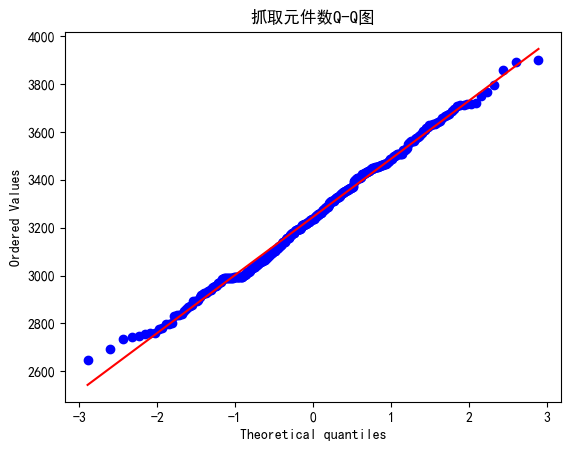

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

variable = data['抓取元件数']

# 绘制Q-Q图
stats.probplot(variable, dist="norm", plot=plt)
plt.title("抓取元件数Q-Q图")

plt.show()

In [153]:
# Step 2: 查看数据的基本信息
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   月份      365 non-null    int64
 1   日期      365 non-null    int64
 2   推出电路板数  365 non-null    int64
 3   抓取元件数   365 non-null    int64
 4   故障A2次数  365 non-null    int64
dtypes: int64(5)
memory usage: 14.4 KB
None
               月份          日期       推出电路板数        抓取元件数      故障A2次数
count  365.000000  365.000000   365.000000   365.000000  365.000000
mean     6.526027   15.720548  3248.380822  3244.753425    6.397260
std      3.452584    8.808321   241.571742   241.618989    2.328395
min      1.000000    1.000000  2650.000000  2647.000000    2.000000
25%      4.000000    8.000000  3062.000000  3058.000000    4.000000
50%      7.000000   16.000000  3238.000000  3234.000000    6.000000
75%     10.000000   23.000000  3433.000000  3429.000000    8.000000
max     12.000000   31.000000  3905.000000  3901.000000   13.00

,月份,日期,推出电路板数,抓取元件数,故障A2次数
0,1,1,3469,3465,7
1,1,2,3259,3255,9
2,1,3,3461,3457,4
3,1,4,3474,3470,7
4,1,5,3451,3447,4


In [209]:
correlation_matrix = data[['推出电路板数', '抓取元件数', '故障A2次数']].corr(method='pearson')
print("相关系数矩阵：")
print(correlation_matrix)

columns = ['推出电路板数', '抓取元件数', '故障A2次数']
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1, col2 = columns[i], columns[j]
        corr, p_value = pearsonr(data[col1], data[col2])
        print(f"{col1} 与 {col2} 的皮尔逊相关系数: {corr}, p值: {p_value}")

相关系数矩阵：
          推出电路板数     抓取元件数    故障A2次数
推出电路板数  1.000000  0.999998 -0.616293
抓取元件数   0.999998  1.000000 -0.616500
故障A2次数 -0.616293 -0.616500  1.000000
推出电路板数 与 抓取元件数 的皮尔逊相关系数: 0.9999980110790238, p值: 0.0
推出电路板数 与 故障A2次数 的皮尔逊相关系数: -0.6162929407758282, p值: 1.4870798869361526e-39
抓取元件数 与 故障A2次数 的皮尔逊相关系数: -0.6164997436659938, p值: 1.3796877227059268e-39


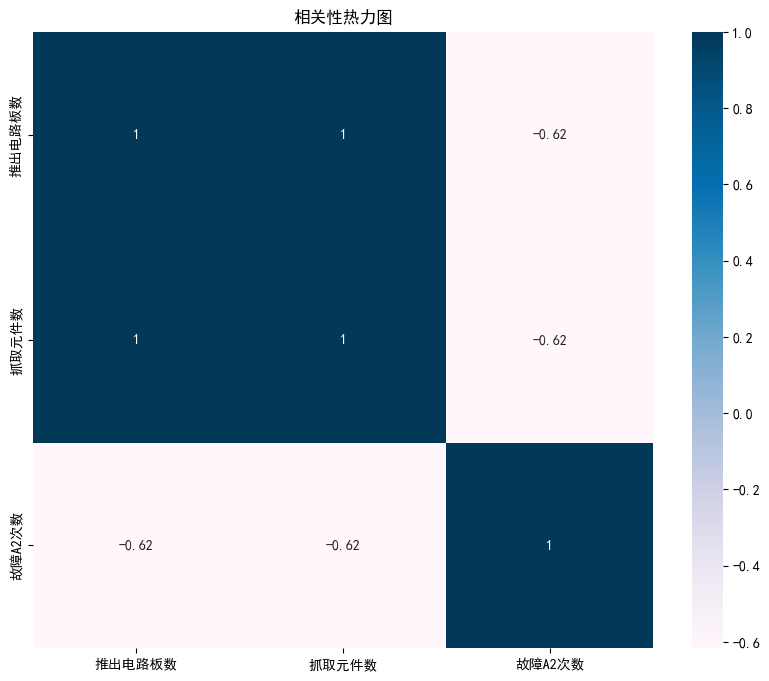

In [213]:
import seaborn as sns

import matplotlib.pyplot as plt

# 设置热力图的大小
plt.figure(figsize=(10, 8))

# 绘制相关性热力图
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', xticklabels=columns, yticklabels=columns)

# 设置标题
plt.title('相关性热力图')

# 显示图像
plt.show()

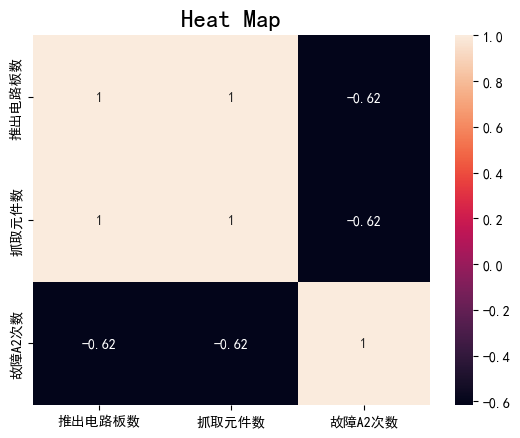

In [210]:

plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(correlation_matrix, annot=True)  # rho改就行，这个是热力矩阵
plt.title('Heat Map', fontsize=18)
plt.savefig('heatmap1.png', dpi=300)

In [197]:
# 输出df_M101中，故障记录为A2，且抓取状态不为-1的
df_M101_A2_not_minus_1 = df_M101[(df_M101['故障类别'] == 'A2') & (df_M101['抓取状态'] != -1)]
print(df_M101_A2_not_minus_1)

Empty DataFrame
Columns: [月份, 日期, 时间, 故障类别, 推出状态, 推出累计数, 抓取状态, 抓取累计数, 安装状态, 安装累计数, 检测状态, 检测累计数, 合格产品累计数, 不合格产品累计数, 新日期]
Index: []
